## Fire Department Calls  in San Francisco


In [448]:
# Dependencies and Setup
import pandas as pd
import numpy as np
from IPython.display import display, HTML
import datetime
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS 


In [391]:
pd.options.display.float_format = '{0:,.2f}'.format
pd.set_option('display.max_columns', 500)

# File to Load 
#fire_data_to_load = "Fire_Department_Calls_for_Service.csv"
fire_data_to_load = "Fire_Department_Calls_for_Service.csv"


# Read Secured Property Tax Rolls - Data is not very clean - Define all data type for faster processing

fire_data = pd.read_csv(fire_data_to_load)




In [392]:
# View the data
#fire_data.head()

In [393]:
fire_data['Year'] = pd.DatetimeIndex(fire_data['Call Date']).year
#fire_data.dtypes

In [394]:
fire_data_year_selected = fire_data.loc[(fire_data["Year"] >= 2006) & (fire_data["Year"] <= 2019)]
#fire_data_year

In [395]:
#Analyze data - Get all possible values for Use Definition
call_type_list = fire_data_year_selected["Call Type Group"].unique()
call_type_list

array(['Medical Incident', 'Traffic Collision', 'Structure Fire',
       'Citizen Assist / Service Call', 'Alarms',
       'Elevator / Escalator Rescue', 'Outside Fire', 'Other',
       'Water Rescue', 'Electrical Hazard',
       'Smoke Investigation (Outside)', 'Odor (Strange / Unknown)',
       'Vehicle Fire', 'Gas Leak (Natural and LP Gases)', 'Fuel Spill',
       'Explosion', 'HazMat', 'Industrial Accidents',
       'Confined Space / Structure Collapse', 'Administrative',
       'Assist Police', 'Train / Rail Incident', 'Marine Fire',
       'Watercraft in Distress', 'High Angle Rescue',
       'Suspicious Package', 'Train / Rail Fire',
       'Extrication / Entrapped (Machinery, Vehicle)',
       'Mutual Aid / Assist Outside Agency',
       'Lightning Strike (Investigation)', 'Aircraft Emergency',
       'Oil Spill'], dtype=object)

In [417]:
fire_data_noDups = fire_data_year_selected.drop_duplicates(["Incident Number"])

In [418]:
fire_data_noDups.head()

,Call Number,Unit ID,Incident Number,Call Type,Call Date,Watch Date,Received DtTm,Entry DtTm,Dispatch DtTm,Response DtTm,On Scene DtTm,Transport DtTm,Hospital DtTm,Call Final Disposition,Available DtTm,Address,City,Zipcode of Incident,Battalion,Station Area,Box,Original Priority,Priority,Final Priority,ALS Unit,Call Type Group,Number of Alarms,Unit Type,Unit sequence in call dispatch,Fire Prevention District,Supervisor District,Neighborhooods - Analysis Boundaries,Location,RowID,Supervisor Districts,Fire Prevention Districts,Current Police Districts,Neighborhoods - Analysis Boundaries,Zip Codes,Neighborhoods,Police Districts,Civic Center Harm Reduction Project Boundary,HSOC Zones,Year
0,191754053,AM114,19075079,Medical Incident,06/24/2019,06/24/2019,06/24/2019 11:52:20 PM,06/24/2019 11:57:07 PM,06/24/2019 11:57:54 PM,06/24/2019 11:58:24 PM,06/25/2019 12:01:33 AM,06/25/2019 12:45:44 AM,06/25/2019 12:53:48 AM,Code 2 Transport,06/25/2019 01:09:12 AM,200 Block of SANCHEZ ST,San Francisco,"94,114.00",B05,6,5231,2,2,2,False,Non Life-threatening,1,PRIVATE,1.00,5,8,Castro/Upper Market,"(37.76511658030717, -122.43102280286743)",191754053-AM114,5.00,15.00,7.00,5.00,"28,862.00",3.00,4.00,nan,nan,2019
2,191754032,QRV1,19075078,Medical Incident,06/24/2019,06/24/2019,06/24/2019 11:44:09 PM,06/24/2019 11:44:58 PM,06/24/2019 11:45:20 PM,06/24/2019 11:45:29 PM,NaN,NaN,NaN,Code 2 Transport,06/24/2019 11:50:06 PM,MCALLISTER ST/LARKIN ST,San Francisco,"94,102.00",B02,36,1553,3,3,3,True,Potentially Life-Threatening,1,SUPPORT,2.00,2,6,Tenderloin,"(37.780470341341406, -122.41694760622579)",191754032-QRV1,9.00,7.00,6.00,36.00,"28,852.00",36.00,9.00,1.00,1.00,2019
4,191754029,E08,19075077,Traffic Collision,06/24/2019,06/24/2019,06/24/2019 11:40:49 PM,06/24/2019 11:42:51 PM,06/24/2019 11:43:20 PM,06/24/2019 11:45:17 PM,06/24/2019 11:47:31 PM,NaN,NaN,Code 2 Transport,06/24/2019 11:50:20 PM,5TH ST/BRYANT ST,San Francisco,"94,107.00",B03,8,2242,3,3,3,False,Potentially Life-Threatening,1,ENGINE,1.00,3,6,South of Market,"(37.7777990101501, -122.40029776053011)",191754029-E08,9.00,14.00,2.00,34.00,"28,856.00",34.00,2.00,nan,nan,2019
7,191754009,78,19075076,Medical Incident,06/24/2019,06/24/2019,06/24/2019 11:33:01 PM,06/24/2019 11:33:50 PM,06/24/2019 11:35:05 PM,06/24/2019 11:35:12 PM,06/24/2019 11:40:45 PM,06/25/2019 12:04:35 AM,06/25/2019 12:13:06 AM,Code 2 Transport,06/25/2019 12:41:16 AM,100 Block of EDDY ST,San Francisco,"94,102.00",B03,3,1453,3,3,3,True,Potentially Life-Threatening,1,MEDIC,2.00,3,6,Tenderloin,"(37.78419090478878, -122.4101194834515)",191754009-78,9.00,14.00,10.00,36.00,"28,852.00",36.00,10.00,1.00,nan,2019
9,191753998,QRV1,19075075,Medical Incident,06/24/2019,06/24/2019,06/24/2019 11:24:52 PM,06/24/2019 11:27:24 PM,06/24/2019 11:28:00 PM,06/24/2019 11:28:05 PM,06/24/2019 11:30:01 PM,NaN,NaN,Fire,06/24/2019 11:37:32 PM,400 Block of OFARRELL ST,San Francisco,"94,102.00",B01,3,1452,3,2,2,True,Potentially Life-Threatening,1,SUPPORT,1.00,3,6,Tenderloin,"(37.78578700513545, -122.41254776255968)",191753998-QRV1,9.00,14.00,10.00,36.00,"28,852.00",36.00,10.00,nan,nan,2019


In [433]:

#fire_data_noDups2.dtypes
#WORD CLOUD for Call Type#

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,Call Number,Unit ID,Incident Number,Call Type,Call Date,Watch Date,Received DtTm,Entry DtTm,Dispatch DtTm,Response DtTm,On Scene DtTm,Transport DtTm,Hospital DtTm,Call Final Disposition,Available DtTm,Address,City,Zipcode of Incident,Battalion,Station Area,Box,Original Priority,Priority,Final Priority,ALS Unit,Call Type Group,Number of Alarms,Unit Type,Unit sequence in call dispatch,Fire Prevention District,Supervisor District,Neighborhooods - Analysis Boundaries,Location,RowID,Supervisor Districts,Fire Prevention Districts,Current Police Districts,Neighborhoods - Analysis Boundaries,Zip Codes,Neighborhoods,Police Districts,Civic Center Harm Reduction Project Boundary,HSOC Zones,Year
149011,183653766,RS1,18153403,Medical Incident,12/31/2018,12/31/2018,12/31/2018 11:57:12 PM,12/31/2018 11:58:04 PM,12/31/2018 11:58:19 PM,12/31/2018 11:58:29 PM,12/31/2018 11:59:47 PM,NaN,NaN,Code 2 Transport,01/01/2019 12:07:11 AM,0 Block of 6TH ST,San Francisco,"94,103.00",B03,1,2251,3,3,3,False,Potentially Life-Threatening,1,RESCUE SQUAD,1.00,3,6,South of Market,"(37.78114586126, -122.409026046516)",183653766-RS1,9.00,14.00,2.00,34.00,"28,853.00",34.00,2.00,1.00,1.00,2018
149013,183653762,E21,18153402,Outside Fire,12/31/2018,12/31/2018,12/31/2018 11:56:11 PM,12/31/2018 11:56:11 PM,12/31/2018 11:56:43 PM,12/31/2018 11:58:14 PM,NaN,NaN,NaN,Fire,01/01/2019 12:02:20 AM,HAIGHT ST/ASHBURY ST,San Francisco,"94,117.00",B05,21,4466,A,3,3,True,Fire,1,ENGINE,1.00,5,5,Haight Ashbury,"(37.770007605724, -122.446933818288)",183653762-E21,11.00,15.00,8.00,3.00,"29,492.00",9.00,5.00,nan,nan,2018
149014,183653760,55,18153401,Medical Incident,12/31/2018,12/31/2018,12/31/2018 11:53:08 PM,12/31/2018 11:55:26 PM,12/31/2018 11:55:41 PM,12/31/2018 11:55:53 PM,01/01/2019 12:00:17 AM,01/01/2019 12:29:50 AM,01/01/2019 12:35:23 AM,Code 2 Transport,01/01/2019 01:11:36 AM,400 Block of CARL ST,San Francisco,"94,122.00",B05,12,7321,3,3,3,True,Potentially Life-Threatening,1,MEDIC,2.00,5,5,Inner Sunset,"(37.76467688189, -122.45777819403)",183653760-55,11.00,15.00,8.00,14.00,56.00,12.00,5.00,nan,nan,2018
149017,183653752,B02,18153400,Alarms,12/31/2018,12/31/2018,12/31/2018 11:50:02 PM,12/31/2018 11:51:41 PM,12/31/2018 11:51:53 PM,12/31/2018 11:52:42 PM,01/01/2019 12:00:56 AM,NaN,NaN,Fire,01/01/2019 12:03:34 AM,800 Block of CLAYTON ST,San Francisco,"94,117.00",B05,12,5151,3,3,3,False,Alarm,1,CHIEF,2.00,5,5,Haight Ashbury,"(37.766548172887, -122.447850161714)",183653752-B02,11.00,15.00,8.00,3.00,"29,492.00",9.00,5.00,nan,nan,2018
149020,183653744,AM245,18153399,Medical Incident,12/31/2018,12/31/2018,12/31/2018 11:48:44 PM,12/31/2018 11:48:44 PM,12/31/2018 11:49:33 PM,12/31/2018 11:50:05 PM,12/31/2018 11:56:04 PM,01/01/2019 12:13:31 AM,01/01/2019 12:20:04 AM,Code 2 Transport,01/01/2019 12:51:23 AM,SUTTER ST/POLK ST,San Francisco,"94,109.00",B04,3,3121,C,2,2,False,Non Life-threatening,1,PRIVATE,1.00,4,3,Nob Hill,"(37.787756652528, -122.420116076828)",183653744-AM245,10.00,13.00,6.00,21.00,"28,858.00",21.00,9.00,nan,nan,2018


In [449]:
supervisor_districts = {
1  : "1-Richmond, Golden Gate Park",
2  : "2-Marina, Pacific Heights",
3  : "3-North Beach, Chinatown, Financial District",
4  : "4-Sunset",
5  : "5-Haight, Fillmore, Hayes Valley",
6  : "6-Union Square, Tenderloin, Civic Center, SOMA",
7  : "7-West Portal, St. Francis Wood, Stonestown",
8  : "8-The Castro, Noe Valley, Twin Peaks",
9  : "9-Mission District, Bernal Heights",
10 : "10-Potrero Hill, Bayview-Hunters Point",
11 : "11-Excelsior,  Ingleside, Outer Mission",
}

In [450]:
#CALLS TYPE OVER TIME
fire_data_calltype_solo= fire_data_noDups2.pivot_table(index="Call Type", values='Incident Number', aggfunc=np.size)
fire_data_calltype_solo2 = pd.DataFrame(fire_data_calltype_solo)
#fire_data_calltype_solo2.head()
#fire_data_calltype_solo['Incident Number']

In [444]:
#Cloud Bubble
d = {}
#for series its. items() and for dataframe its iterrows()
for a, x in fire_data_calltype_solo['Incident Number'].items():
    d[a] = x


wordcloud = WordCloud(background_color='white',width=3600, height=2200)
wordcloud.generate_from_frequencies(frequencies=d)
plt.imshow(wordcloud, interpolation="bilinear")
#plt.figure(figsize=(11,11), facecolor='k')
#plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
#plt.tight_layout(pad=0)
plt.show()

AttributeError: 'AxesSubplot' object has no attribute 'show'

In [437]:
# CALL TYPE Group OVER TIME
fire_data_calltype= fire_data_noDups2.pivot_table(index="Year", columns="Call Type Group", values='Incident Number', aggfunc=np.size)
fire_data_calltype.head(200)

Call Type Group,Alarm,Fire,Non Life-threatening,Potentially Life-Threatening
Year,,,,
2012,24175,4017,36508,55191
2013,24167,3054,38099,55537
2014,25163,2865,38862,57027
2015,25341,3190,43762,62708
2016,25708,3097,48460,64193
2017,25671,3337,52095,67004
2018,25696,3527,53734,66043


In [403]:
# #PLOT OF Calls OVER TIME
# plt = fire_data_calltype.plot()

# plt.show()

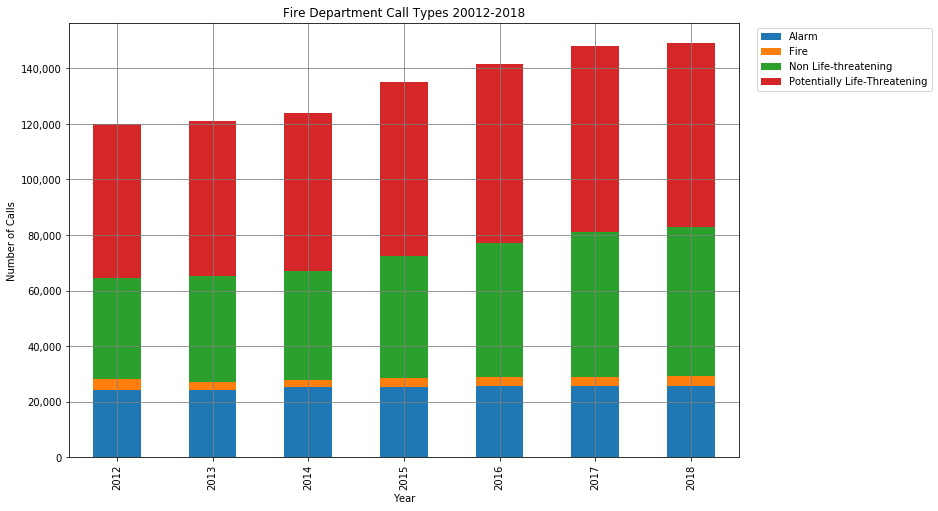

In [440]:
ax = fire_data_calltype.plot.bar(stacked=True, figsize=(12,8), legend = False)
plt.legend((fire_data_calltype.columns.tolist()),  bbox_to_anchor=(1.02, 1.0))

# Complete formatting the plot
plt.title("Fire Department Call Types 20012-2018")
plt.xlabel("Year")
plt.ylabel("Number of Calls")
plt.grid(linestyle='-', color = 'gray')

ax.get_yaxis().set_major_formatter(
  plt.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.show()

In [445]:
# DISTRICT OVER TIME
fire_data_districtovertime= fire_data_noDups2.pivot_table(index="Year", columns="Supervisor District", values='Incident Number', aggfunc=np.size)
fire_data_districtovertime.head()

Supervisor District,1,2,3,4,5,6,7,8,9,10,11
Year,,,,,,,,,,,
2012,5502,6892,15072,4447,11997,35058,6086,8125,10756,10671,5290
2013,5596,6865,15404,4394,12135,35437,6045,8136,10935,10833,5080
2014,5583,7418,15945,4349,12332,37026,6259,8336,10664,10983,5036
2015,6115,8096,17599,4837,13259,40170,6681,8992,12018,11779,5461
2016,6304,8133,18479,4927,13516,43149,6850,9478,12276,12493,5966


TypeError: 'Text' object is not callable

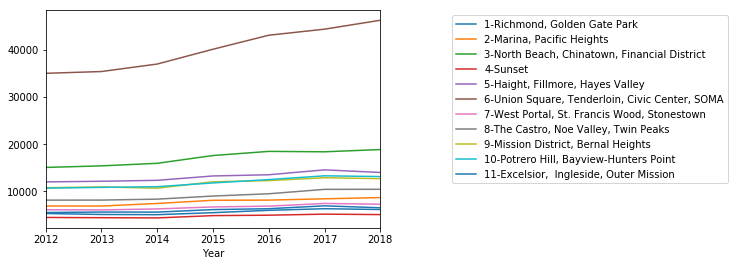

In [446]:
plt = fire_data_districtovertime.plot()
plt.legend(list(supervisor_districts.values()), bbox_to_anchor=(1.2, 1.0))
plt.title("Calls to Fire Department 2006-2018")

plt.show()

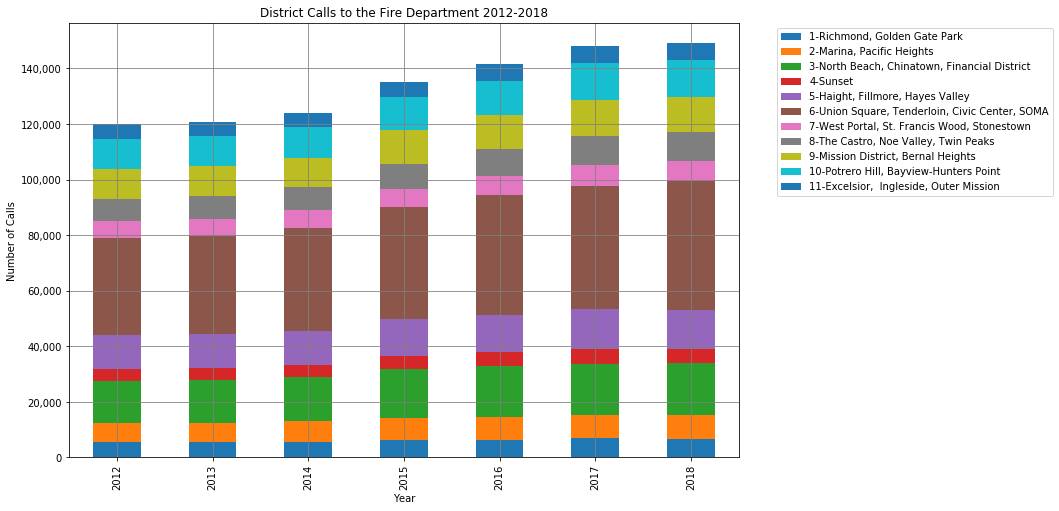

In [454]:
ax = fire_data_districtovertime.plot.bar(stacked=True, figsize=(12,8), legend = False)
#plt.legend((fire_data_districtovertime.columns.tolist()),  bbox_to_anchor=(1.05, 1.0))
plt.legend(list(supervisor_districts.values()), bbox_to_anchor=(1.05, 1.0))

# Complete formatting the plot
plt.title('District Calls to the Fire Department 2012-2018')
plt.xlabel("Year")
plt.ylabel("Number of Calls")
plt.grid(linestyle='-', color = 'gray')

ax.get_yaxis().set_major_formatter(
  plt.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.show()

In [459]:
count = fire_data_noDups2.groupby(["Call Type Group"]).count()
count
#count_df = pd.DataFrame({"Call Type Group": "Call Number"})
#count_df.head()
#plt.pie(count["Call Number"].count)  
#plt.show()

,Call Number,Unit ID,Incident Number,Call Type,Call Date,Watch Date,Received DtTm,Entry DtTm,Dispatch DtTm,Response DtTm,On Scene DtTm,Transport DtTm,Hospital DtTm,Call Final Disposition,Available DtTm,Address,City,Zipcode of Incident,Battalion,Station Area,Box,Original Priority,Priority,Final Priority,ALS Unit,Number of Alarms,Unit Type,Unit sequence in call dispatch,Fire Prevention District,Supervisor District,Neighborhooods - Analysis Boundaries,Location,RowID,Supervisor Districts,Fire Prevention Districts,Current Police Districts,Neighborhoods - Analysis Boundaries,Zip Codes,Neighborhoods,Police Districts,Civic Center Harm Reduction Project Boundary,HSOC Zones,Year
Call Type Group,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Alarm,175921,175921,175921,175921,175921,175921,175921,175921,175921,168684,132356,1255,1251,175921,175413,175921,175566,175899,175921,175605,175902,175048,175921,175921,175921,175921,175921,175921,175921,175921,175921,175921,175921,175921,175031,174890,175850,175912,175850,174890,23281,29443,175921
Fire,23087,23087,23087,23087,23087,23087,23087,23087,23087,22065,18699,111,102,23087,22918,23087,22926,23081,23087,23062,23076,22915,23087,23087,23087,23087,23087,23086,23087,23087,23087,23087,23087,23087,22613,22773,23063,23063,23063,22773,2174,4177,23087
Non Life-threatening,311520,311520,311520,311520,311520,311520,311520,311520,311520,302664,272482,158671,155978,311520,309493,311520,310614,311464,311520,311205,311502,308146,311519,311520,311520,311520,311520,311520,311520,311520,311520,311520,311520,311520,309749,310519,311404,311489,311404,310519,62367,72785,311520
Potentially Life-Threatening,427703,427703,427703,427703,427703,427703,427703,427703,427703,412531,362603,166912,162938,427703,425799,427703,426721,427655,427703,427271,427698,422399,427703,427703,427703,427703,427703,427703,427703,427703,427703,427703,427703,427703,425668,426553,427585,427676,427585,426553,87151,101729,427703


In [ ]:
# #Data Frame by Year, District, Call Type, Number of Incidents
# District_Count = pd.DataFrame({"Number of Incidents": count["Incident Number"]})
# District_Count


In [ ]:
# #Taking no dups tavle into a pivot --> essentially the same as the District Count DF
# #Pivot fire_data_year (incident numbe) dataframe by Supervisor District
# # fire_data_clean_grouped_pivot = fire_data_noDups.pivot(index="Year", columns=["Supervisor District"])
# fire_data_clean_grouped_pivot = fire_data_noDups2.pivot_table(index="Year", columns=["Supervisor District", "Call Type"], values='Incident Number', aggfunc=np.size)

# fire_data_clean_grouped_pivot.head()

In [ ]:
# #Pivot fire_data_year (incident numbe) dataframe by Supervisor District
# # fire_data_clean_grouped_pivot = fire_data_noDups.pivot(index="Year", columns=["Supervisor District"])
# fire_data_clean_grouped_pivot = fire_data_noDups2.pivot_table(index="Year", columns=["Supervisor District", "Call Type"], values='Incident Number', aggfunc=np.size)

# fire_data_clean_grouped_pivot.head()